In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
df1 = pd.read_csv('ECG5000_TEST.txt',sep='  ', header = None)
df2 = pd.read_csv('ECG5000_TRAIN.txt',sep='  ', header = None)

<ipython-input-2-13264b6881a7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('ECG5000_TEST.txt',sep='  ', header = None)
<ipython-input-2-13264b6881a7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('ECG5000_TRAIN.txt',sep='  ', header = None)


In [3]:
df = pd.concat([df1, df2])

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1.0,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1.0,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1.0,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1.0,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.416582,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.0,-0.478577,-1.779959,-2.398159,-3.170112,-3.559732,-3.573956,-2.989770,-2.270605,-1.688277,...,1.294840,1.160885,1.456331,2.209421,2.507175,2.198534,1.705849,1.492642,1.561890,1.520161
496,4.0,-1.325210,-2.480992,-2.965356,-3.342392,-3.176351,-2.891528,-2.369679,-1.598750,-1.071751,...,0.552076,-0.172154,-0.864803,-1.549854,-2.460243,-3.366562,-3.466546,-2.718380,-1.855209,-1.539958
497,4.0,-0.021964,-0.912434,-1.903353,-2.662829,-3.122156,-3.451490,-3.392982,-2.929937,-2.256294,...,1.528745,1.339479,1.457995,2.128078,2.630759,2.295748,1.764967,1.444280,1.432347,1.457028
498,5.0,0.288011,-1.098020,-2.500250,-3.598599,-3.650608,-3.281587,-2.231601,-1.250656,-1.072574,...,0.081634,-0.029242,0.071414,0.118161,-0.071967,-0.171214,0.131211,0.049872,0.010915,-0.081534


In [5]:
df.columns


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [6]:
df = df.add_prefix('c')

In [7]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [8]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size = 0.2, random_state = 111)

In [10]:
scaler = MinMaxScaler()

In [11]:
data_scaled = scaler.fit(train_data)

In [12]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [13]:
train_data_scaled

array([[0.        , 0.68350165, 0.84555441, ..., 0.50027762, 0.49587899,
        0.39114839],
       [0.        , 0.44621304, 0.31053752, ..., 0.77834844, 0.78233943,
        0.46629036],
       [0.        , 0.71203288, 0.64553551, ..., 0.83309413, 0.67825035,
        0.51983982],
       ...,
       [0.25      , 0.36459305, 0.40436209, ..., 0.2880798 , 0.36659954,
        0.39484257],
       [0.        , 0.44695501, 0.3526011 , ..., 0.7355411 , 0.60488833,
        0.30667936],
       [0.25      , 0.51092627, 0.53072929, ..., 0.27098994, 0.35724797,
        0.39934207]])

In [14]:
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [16]:
normal_train_data[0]

array([0.68350165, 0.84555441, 0.69593827, 0.59489329, 0.40366081,
       0.22951262, 0.22956923, 0.34856859, 0.47911632, 0.53663546,
       0.59382236, 0.68962349, 0.68734143, 0.71935486, 0.69759656,
       0.67137234, 0.63923203, 0.69446794, 0.65206664, 0.63706869,
       0.60677776, 0.67395134, 0.68062489, 0.69240026, 0.70923525,
       0.64485645, 0.64030619, 0.55993455, 0.51455675, 0.62334069,
       0.64608077, 0.62519485, 0.59527381, 0.54257912, 0.47454235,
       0.52241564, 0.56772172, 0.55530842, 0.50930876, 0.52737405,
       0.60448225, 0.61284081, 0.52673091, 0.58312978, 0.55108749,
       0.49248587, 0.4594052 , 0.5229738 , 0.60194529, 0.65509898,
       0.63751177, 0.62055723, 0.63212288, 0.62164274, 0.65767674,
       0.67516734, 0.65152729, 0.64113323, 0.70440507, 0.71998202,
       0.69360386, 0.6995709 , 0.70611529, 0.73121126, 0.69916577,
       0.68722216, 0.67128677, 0.70618745, 0.82442276, 0.73662482,
       0.79093324, 0.80759476, 0.78001227, 0.72479591, 0.86648

In [69]:
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [70]:
print(normal_train_data.shape)
print(normal_test_data.shape)

(2361, 140)
(558, 140)


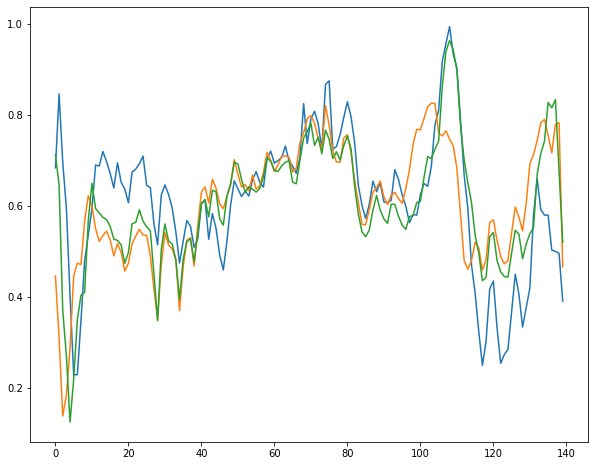

In [71]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

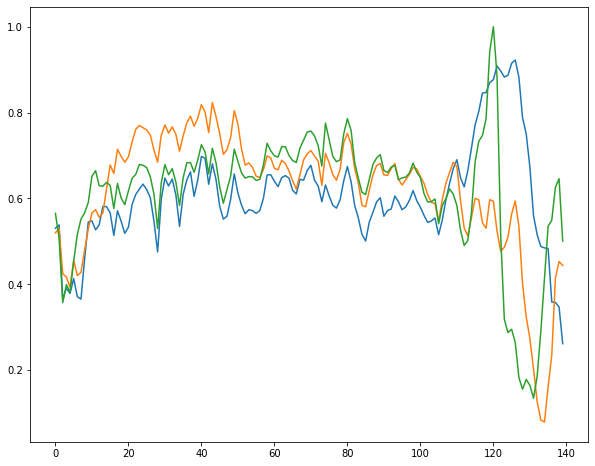

In [72]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140, activation='sigmoid'))

In [74]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16,activation='relu'),
            tf.keras.layers.Dense(32,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(140,activation='sigmoid'),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [77]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=10, 
                                                  mode = 'min')
model.compile(optimizer='adam', loss='mae')

In [78]:
history = model.fit(normal_train_data, normal_train_data,
                   epochs = 50,
                   batch_size = 128,
                   validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]),
                   shuffle = True,
                   callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 1s 20ms/step - loss: 0.1407 - val_loss: 0.1286
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.1074 - val_loss: 0.0824
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0595 - val_loss: 0.0751
Epoch 4/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0481 - val_loss: 0.0746
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0463 - val_loss: 0.0740
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0459 - val_loss: 0.0743
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0458 - val_loss: 0.0734
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0460 - val_loss: 0.0728
Epoch 9/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0443 - val_loss: 0.0722
Epoch 10/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0439 - val_loss: 0.0700
Epoch 11/50
19/1

In [79]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [81]:
encoder_out.shape

(558, 8)

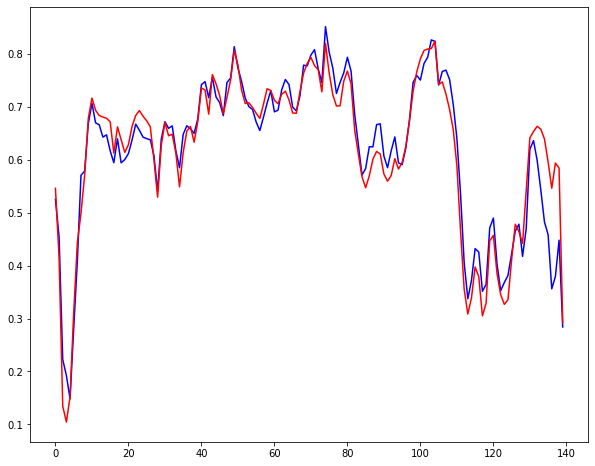

In [82]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

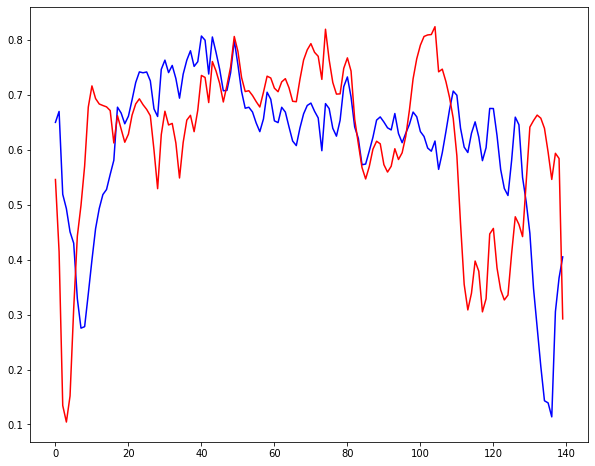

In [83]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out[0],'r')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.0115031 , 0.01325138, 0.01499967, 0.01674795, 0.01849624,
        0.02024452, 0.02199281, 0.02374109, 0.02548938, 0.02723766,
        0.02898595, 0.03073423, 0.03248252, 0.0342308 , 0.03597909,
        0.03772737, 0.03947566, 0.04122394, 0.04297223, 0.04472052,
        0.0464688 , 0.04821709, 0.04996537, 0.05171366, 0.05346194,
        0.05521023, 0.05695851, 0.0587068 , 0.06045508, 0.06220337,
        0.06395165, 0.06569994, 0.06744822, 0.06919651, 0.07094479,
        0.07269308, 0.07444136, 0.07618965, 0.07793793, 0.07968622,
        0.0814345 , 0.08318279, 0.08493107, 0.08667936, 0.08842764,
        0.09017593, 0.09192421, 0.0936725 , 0.09542078, 0.09716907,
        0.09891735]),
 <a list of 558 BarContainer objects>)

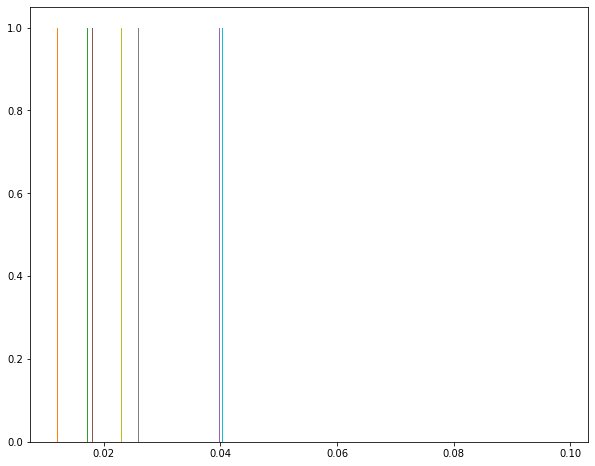

In [85]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

plt.hist(train_loss, bins = 50)

In [87]:
np.mean(train_loss)

0.02630876059906938

In [88]:
np.std(train_loss)

0.011569062979802976

In [89]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [90]:
threshold

0.04944688655867534

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.03845217, 0.04155791, 0.04466365, 0.04776938, 0.05087512,
        0.05398086, 0.0570866 , 0.06019234, 0.06329808, 0.06640381,
        0.06950955, 0.07261529, 0.07572103, 0.07882677, 0.08193251,
        0.08503824, 0.08814398, 0.09124972, 0.09435546, 0.0974612 ,
        0.10056694, 0.10367267, 0.10677841, 0.10988415, 0.11298989,
        0.11609563, 0.11920137, 0.1223071 , 0.12541284, 0.12851858,
        0.13162432, 0.13473006, 0.1378358 , 0.14094153, 0.14404727,
        0.14715301, 0.15025875, 0.15336449, 0.15647023, 0.15957597,
        0.1626817 , 0.16578744, 0.16889318, 0.17199892, 0.17510466,
        0.1782104 , 0.18131613, 0.18442187, 0.18752761, 0.19063335,
        0.19373909]),
 <a list of 442 BarContainer objects>)

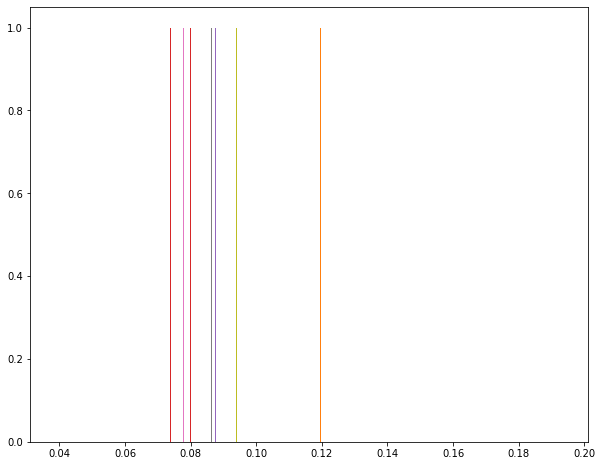

In [91]:
reconstructions = model.predict(anomaly_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomaly_test_data)

plt.hist(test_loss, bins = 50)

In [94]:
np.mean(test_loss)

0.08311017563489527

In [95]:
np.std(test_loss)

0.015774353522477323

In [96]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(558,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [97]:
preds = tf.math.less(train_loss, threshold)

In [100]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=537>

In [101]:
preds.shape

TensorShape([558])

In [102]:
preds_a = tf.math.greater(test_loss, threshold)

In [103]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=437>

In [104]:
preds_a.shape

TensorShape([442])